In [9]:
##Experiments with Data Analytics Vidya! 

In [10]:
#Step 1 - Loading the dataset
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
#Step 2 - Univariate Analysis
#Let's start by exploring each variable one by one
#datatype (to see if its categorical or continous var)
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [12]:
#for continous variables
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [13]:
#for categorical vars
#first lets a list of all categorical variables
cat_var = train.dtypes.loc[train.dtypes == 'object'].index
print cat_var

Index([u'Workclass', u'Education', u'Marital.Status', u'Occupation',
       u'Relationship', u'Race', u'Sex', u'Native.Country', u'Income.Group'],
      dtype='object')


In [14]:
#next, determine the unique values in each column using apply function
train[cat_var].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [15]:
#analyzing race (print counts in each category)
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [16]:
#for percentages
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [17]:
train.shape

(32561, 12)

In [18]:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [19]:
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [26]:
#Now lets start with Multivariate analysis
#Even here, Categorical vs Continous is a real deal. There are three combinations
#1. categorical - categorical
#2. continuous - continuous
#3. categorical - continuous

#First Cat-Cat. We'll use cross tabulation for this. Between "Sex" & "Income group"

cross_tab = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
cross_tab

Income.Group,<=50K,>50K,All
Sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


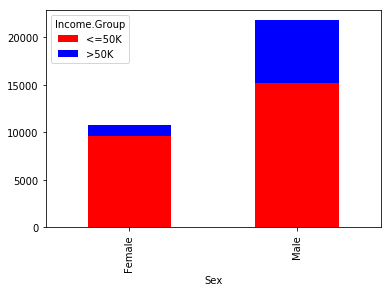

In [27]:
#plot it using stacked chart
%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

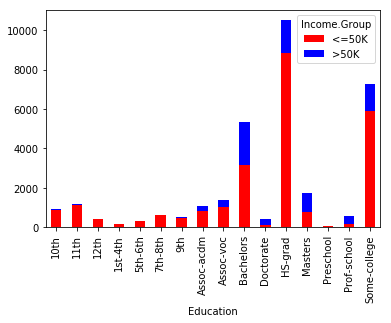

In [22]:
#This is for education

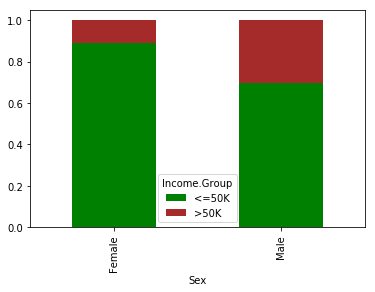

In [28]:
#Round numbers are not very intuitive, so let us calc the percentages and then plot
ct = cross_tab
def percConvert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(percConvert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['green','brown'],grid=False)

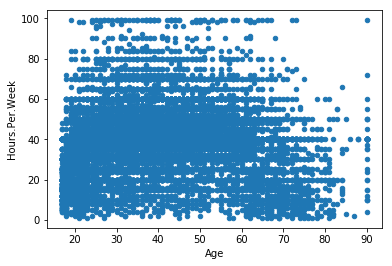

In [30]:
#next, lets do other types. both continous -
train.plot('Age','Hours.Per.Week',kind='scatter')

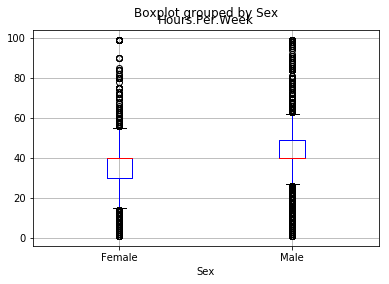

In [31]:
#this didnt really show us anything interesting
#lets move on to the next type. Category-Continous combination
#so lets rewind, we use bar charts for (i) type, plots for (ii) and box-plots for (iii)

#here lets plot a box plot

train.boxplot(column='Hours.Per.Week', by='Sex')

In [32]:
#Step 3 - Missing value treatment. Solve it using imputation methods
#Checking missing values in training data
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [34]:
#Similiarly check for Testing data
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [36]:
#So you can notice that all 3 of the features are categorical.
#We can solve this by imputing it with mode values

from scipy.stats import mode

mode(train['Workclass']).mode[0]

'Private'

In [37]:
#lets impute the shit out of it
var_to_impute = ['Workclass','Occupation','Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]).mode[0], inplace=True)
    test[var].fillna(mode(test[var]).mode[0], inplace=True)
    

In [39]:
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [40]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

In [41]:
#Hurray!

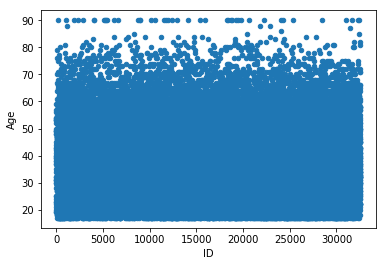

In [42]:
#Step 4 - Outlier Treatment
#Best way to check a outlier is by making a scatter plot
%matplotlib inline
train.plot('ID','Age',kind='scatter')

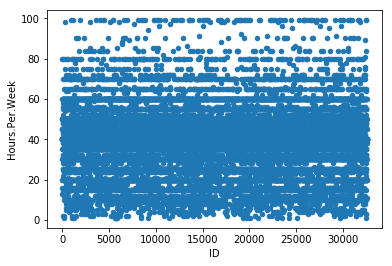

In [43]:
%matplotlib inline
train.plot('ID','Hours.Per.Week',kind='scatter')

In [45]:
#Step 5 - Variable transformation. 
#it means adding new var, or modifying existing var in order to make our model accurate

#lets that workclass var and explore that

train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [46]:
#here we can see that below 0.05 can be combined to form a higher percentage 

categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

In [50]:
#Now run a loop and combine the values of these features into one feature called "Others"

for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'},inplace=True)
    test['Workclass'].replace({cat:'Others'},inplace=True)
    

In [64]:
#Check if the changes happened
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [52]:
#Note that combining is not the best possible techniqe for solving the problem of high cardinality, i.e. high number of unique values.

In [54]:
#Bingo. We did good. But now we have to repeat this for all the features. We can do this using a loop
#Combing the rest
#Step 5.1 - Make a list of variables to combine
categorical_variables = list(train.dtypes.loc[train.dtypes=='object'].index)
categorical_variables

['Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [61]:
#removing workclass
categorical_variables = categorical_variables[1:]
categorical_variables



['Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']

In [56]:
#Step 5.2 - check current no of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [57]:
#Step 5.3 - Running a loop and combining categories

for column in categorical_variables:
    #determine the cat to combine
    frq = train[column].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values < 0.05].index
    
    #loop over these features and combine them as "Others"
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'},inplace=True)
        test[column].replace({cat:'Others'},inplace=True)
    


In [58]:
#Check teh results
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [66]:
#Checking the Marital.Status. You can see that unique var reduced from 7 to 4
train['Marital.Status'].value_counts()/train.shape[0]

Married-civ-spouse    0.459937
Never-married         0.328092
Divorced              0.136452
Others                0.075520
Name: Marital.Status, dtype: float64

In [67]:
##Done with all the EDA and Dicing-Slicing. Lets get down to business now
##Modeling time!

#For modeling using sklearn in Pandas, we have to adopt the following steps:
#Data Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers
#Training model: fit the model on training data
#Making predictions: use the model to make predictions on test data
#Analyze results: compare the train and test accuracy and derive insights required to improve the model

In [76]:
#Step 1 - Data Preprocessing. Conv text to numbers. 
#Label encoder is used to conv categories to num

from sklearn.preprocessing import LabelEncoder
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables

Index([], dtype='object')

In [77]:
#Conv em using Label Encoder
le = LabelEncoder()
for var in categorical_variables:
    train[var] = le.fit_transform(train[var])
    test[var] = le.fit_transform(test[var])

In [78]:
#Checking using dtypes
train.dtypes

ID                int64
Age               int64
Workclass         int32
Education         int32
Marital.Status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours.Per.Week    int64
Native.Country    int32
Income.Group      int32
dtype: object

In [80]:
#Step 2 - Fit the model
#we are using Decision Tree Classifier for this

from sklearn.tree import DecisionTreeClassifier


In [81]:
#Define predictors - Here it will all vars except ID & Target var

dependent_var = 'Income.Group'
independent_var = [x for x in train.columns if x not in ['ID', dependent_var]]
print independent_var

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


In [82]:
#We'll have few benchmark parameters
#max_depth = 10
#min_samples_leaf = 100
#max_features = 'sqrt'

In [83]:
#Init the algo

model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')

#Fit the algo

model.fit(train[independent_var],train[dependent_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
#Step 3 - Make predictions 

predictions_train = model.predict(train[independent_var])
predictions_test = model.predict(test[independent_var])


In [85]:
#Step 4 - Analyze results

from sklearn.metrics import accuracy_score
#Determine train error
acc_train = accuracy_score(train[dependent_var],predictions_train)

print "Training accuracy =  %f"%acc_train

Training accuracy =  0.818003


In [94]:
#Step 5 - Making Submission

submission=pd.read_csv('sample_submisson.csv')
submission.ID = test.ID
income_group = ['<=50K']*len(test['ID'])

for i in range(len(predictions_test)):
    if predictions_test[i] == 1:
        income_group[i] = '>50K'
submission['Income.Group'] = income_group
submission.to_csv('submission02.csv', index=False)

In [ ]:
Score is 0.813